<a href="https://colab.research.google.com/github/smarvar/endmembers/blob/main/MultispectralAnalisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracción de Endmembers 

## Se cargan las bandas y se procesan para su analisis

In [6]:
# import all content drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# Se importan las librerias a utilizar
import os, sys
from PIL import Image
import numpy as np
import h5py
import matplotlib.pyplot as plt
from tqdm import tqdm
try:
  import pysptools 
  need_pysptools=False
except ModuleNotFoundError or ImportError:
    need_pysptools=True
if need_pysptools:
    !pip install pysptools
    import pysptools

In [53]:
# rute HSI
path = "/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/hyp/"
# list with HSI
dirs = os.listdir(path)

In [ ]:
# Usar para renombrar las bandas y dejar unicamente el numero respectivo de banda, se hace solo la primer vez
"""# rename bands name. Only bands number
for file in dirs:
  #file.find('WL_') #encontrar la posición que contiene el número de la banda
  im1 = Image.open(path+file)
  im1 = im1.save(path+'rename/'+file[56:62]+'.tif') #
im1.close()"""

Se genera un Hipercubo con todas las bandas a procesar

In [54]:
path2 = path + 'rename/' # ruta donde se encuentran las bandas ya renombradas con solo el número de banda respectivo
dirs2 = os.listdir(path2)
dirs2 = sorted(dirs2)
n_bands = len(dirs2) #numero total de bandas
y, x = 648, 1022 #Numero de pixeles por fila y col. Conocidos a priori
hypercube = np.zeros(shape=(y,x,n_bands)) # se genera un hipercubo que contendra todas las bandas
cont = 0

# Se lee cada banda y se asigna a la posición respectiva del hypercubo
for file in dirs2:
  hypercube[:,:,cont] = Image.open(path2+file)
  cont+=1 

In [ ]:
# Se genera un lista con el numero de cada una de las bandas
for a in dirs2:
  dirs3.append(a[0:5])

In [55]:
# Ver el contenido de una banda en especifico
print(hypercube[:,:,100])

[[ 3669.  3284.     0. ...  7257.  7429. 11805.]
 [ 6161.  3145.  1211. ...  7590.  6965. 12061.]
 [ 6398.  4586.    65. ...     0.  8971. 13894.]
 ...
 [12202. 13887. 15213. ... 12817. 11252. 12932.]
 [13444. 14442. 16230. ... 20512. 15670. 15510.]
 [11565. 12819. 17192. ... 21166. 18825. 18628.]]


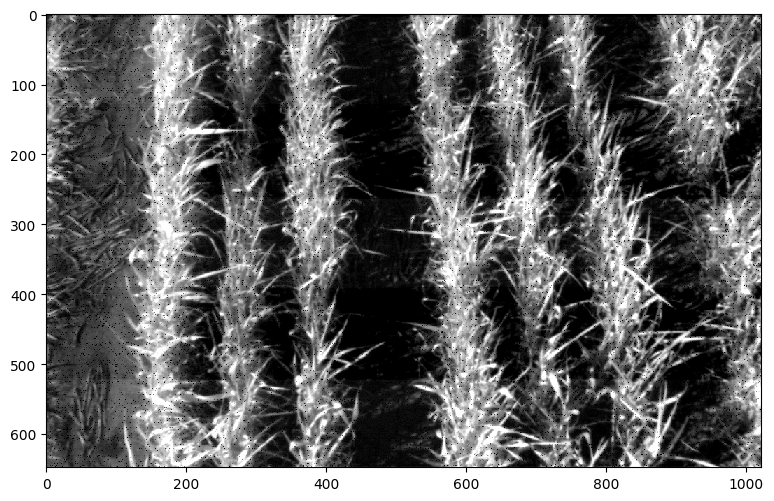

In [77]:
# Ploteo de una de las bandas
fig = plt.figure(figsize=(10,6), dpi=100)   
plt.imshow(hypercube[:,:,300], cmap='gray')
plt.show()

## Aplicación de los algoritmos endmemberd extraction de pystools

Se importan los paquetes de la libreria a utilizar

In [ ]:
#  Se importan los paquetes a utilizar de pystools
import pysptools.util as util
import pysptools.eea as eea #endmembers extraction algorithms
import pysptools.abundance_maps as amap
import pysptools.classification as cls
import pysptools.material_count as cnt
import time 
%matplotlib inline
#for clean output, to not print warnings, don't use when developing script
import warnings
warnings.filterwarnings('ignore')

###N-FINDR endmembers induction algorithm.

In [ ]:
start_time = time.time()
ee = eea.NFINDR() #N-FINDR endmembers induction algorithm.
n_endmembers =36 # number endmembers to find
U = ee.extract(hypercube,n_endmembers,maxit=None,normalize=False,ATGP_init=True)
elapsed_time = time.time() - start_time
print('Time: ' + str(elapsed_time/60) + ' Minutes')

Time: 29.9443151673 Minutes


In [ ]:
# Save endmembers found for FINDR() algorithm
import h5py
with h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/U_NFINDR.hdf5', 'w') as f:
    dset = f.create_dataset("default", data=U)

In [ ]:
# Open endmembers found for FINDR() algorithm
f = h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/U_NFINDR.hdf5', 'r')
data = f['default']


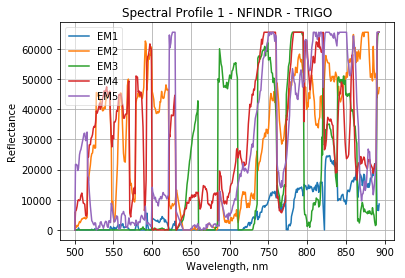

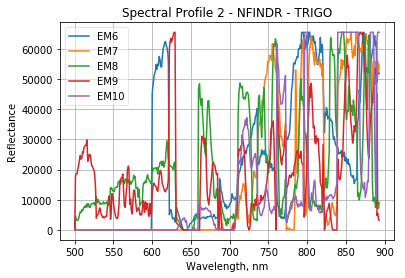

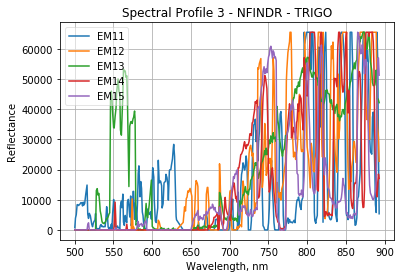

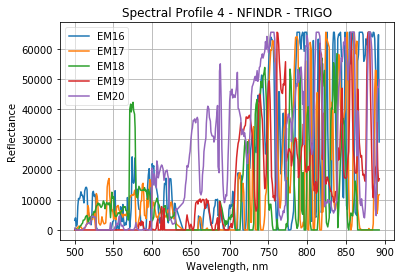

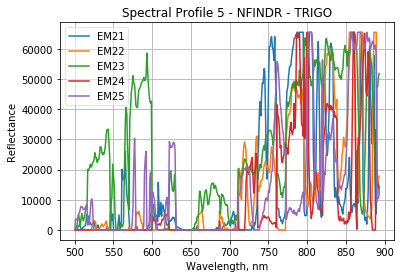

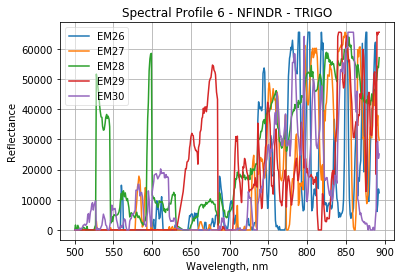

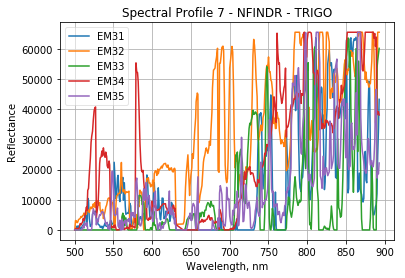

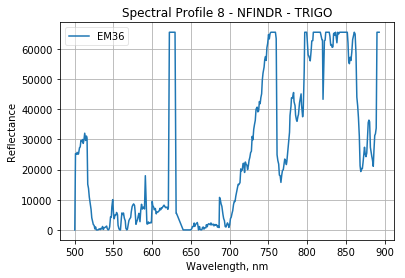

In [ ]:
# Spectral endmembers 
ee_axes = {}
ee_axes['wavelength'] = [float(i) for i in dirs3]
ee_axes['x']='Wavelength, nm' #x axis label
ee_axes['y']='Reflectance' #y axis label 
ee.display(axes=ee_axes,suffix='TRIGO')

Mapa de abundancias

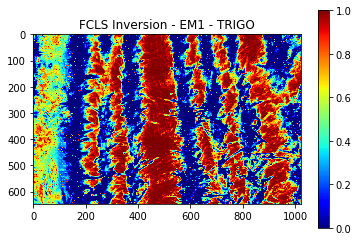

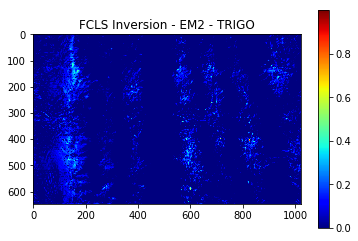

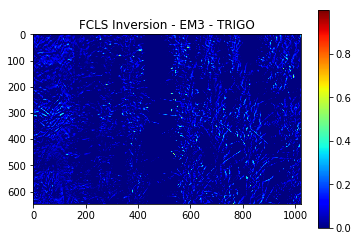

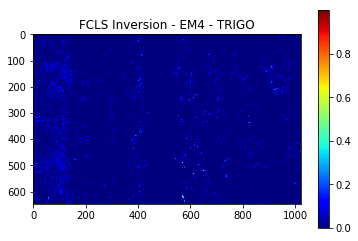

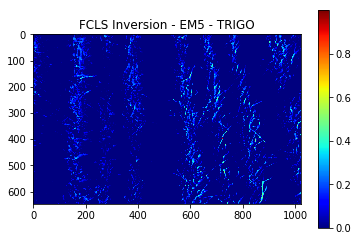

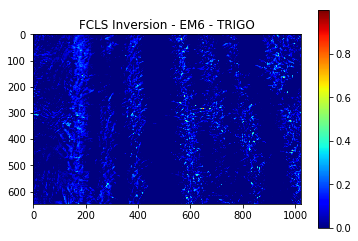

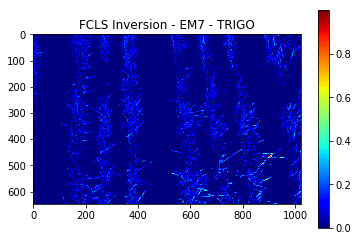

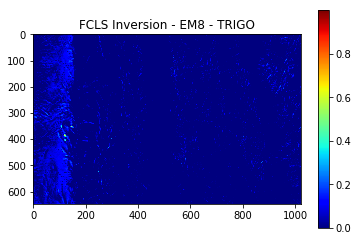

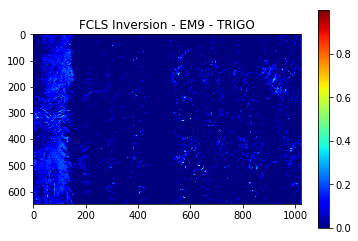

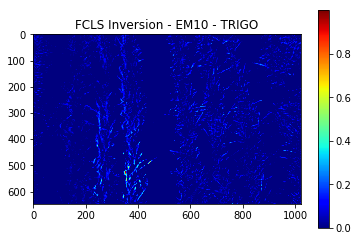

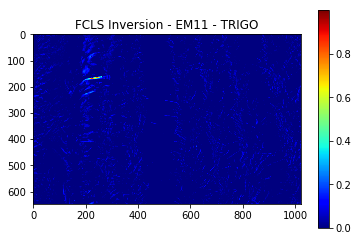

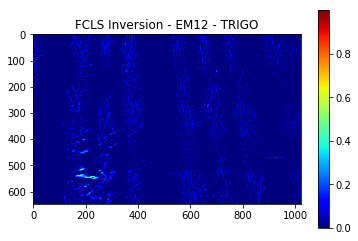

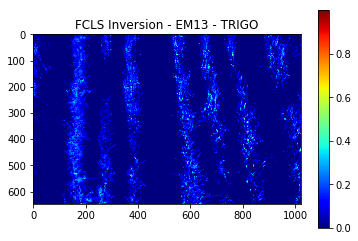

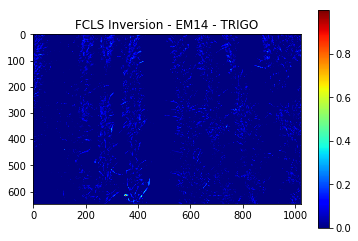

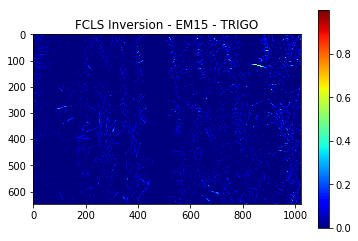

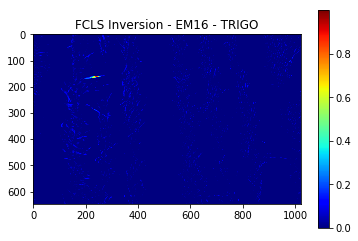

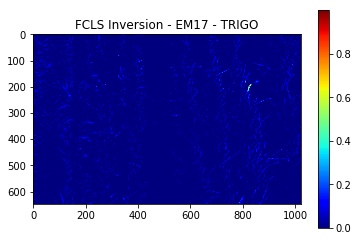

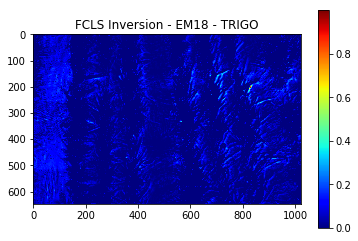

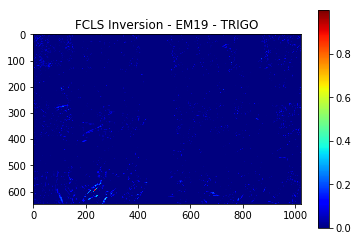

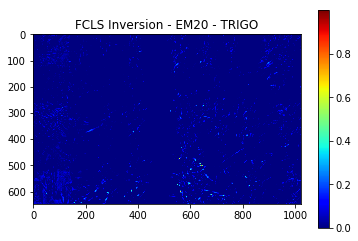

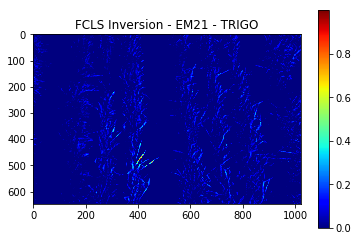

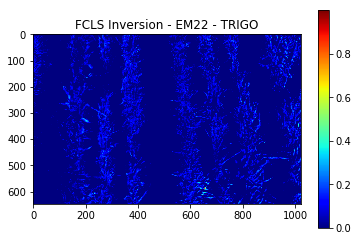

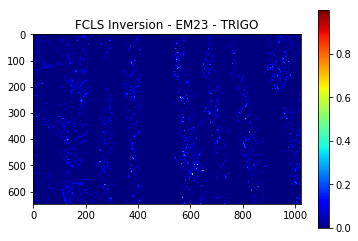

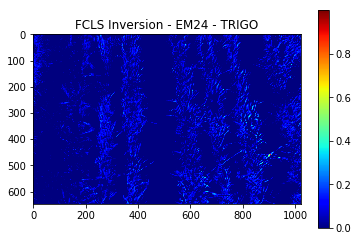

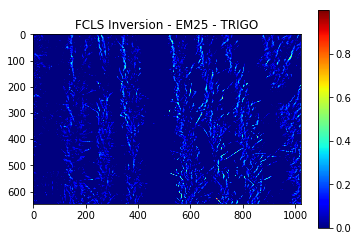

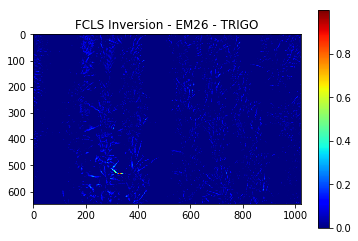

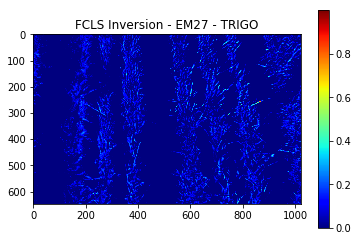

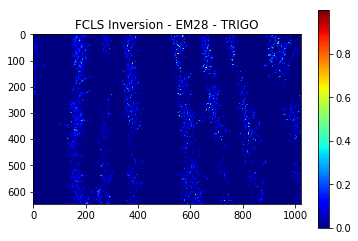

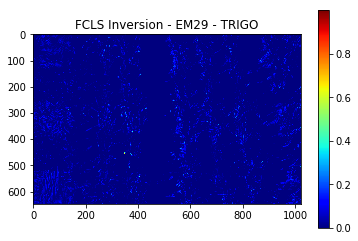

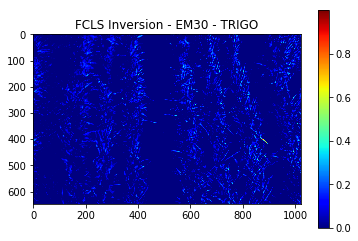

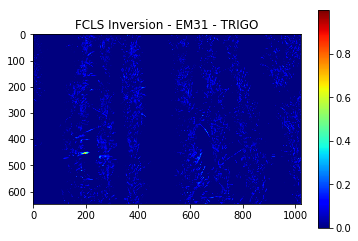

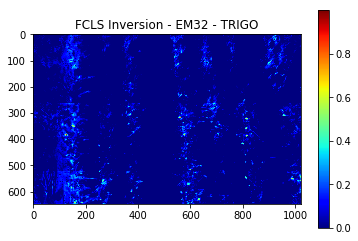

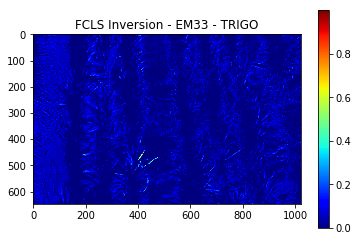

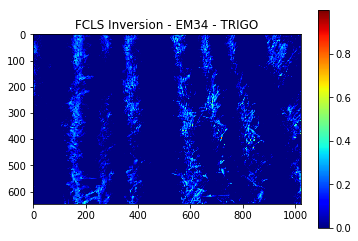

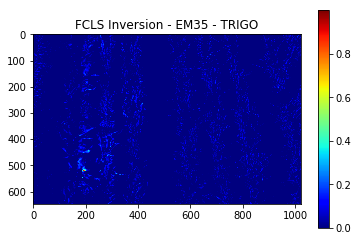

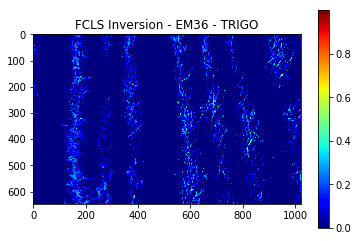

Time: 53.1761536002 Minutes


<Figure size 432x288 with 0 Axes>

In [ ]:
start_time = time.time()
am = amap.FCLS() #object amap Fully Constrained Least Squares
amaps = am.map(hypercube,U,normalize=False) 
am.display(colorMap='jet',columns=n_endmembers,suffix='TRIGO') # Plot abundance maps
elapsed_time = time.time() - start_time
print('Time: ' + str(elapsed_time/60) + ' Minutes')

In [ ]:
with h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/amaps_NFINDR.hdf5', 'w') as f:
    dset = f.create_dataset("default", data=amaps)

###Automatic Target Generation Process (ATGP)

In [ ]:
start_time = time.time()
ee2 = eea.ATGP() #Automatic Target Generation Process (ATGP)
n_endmembers = 36
U2 = ee2.extract(hypercube,n_endmembers)
print('Time: ' + str(elapsed_time/60) + ' Minutes')

Time: 53.1761536002 Minutes


In [ ]:
with h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/U_ATGP.hdf5', 'w') as f:
    dset = f.create_dataset("default", data=U2)

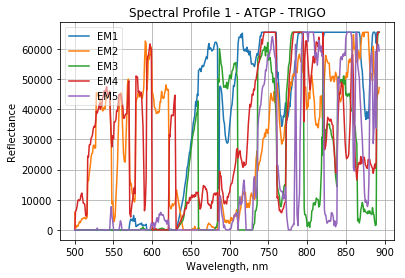

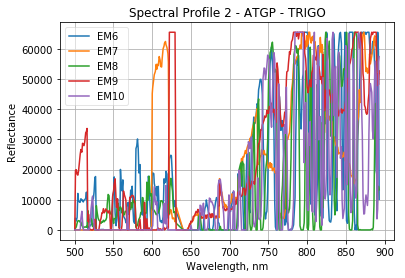

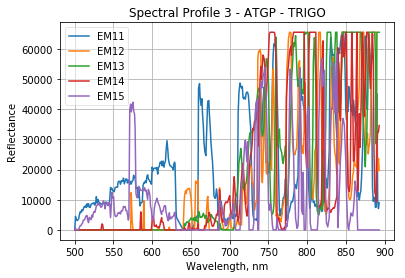

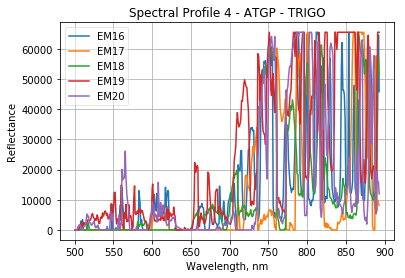

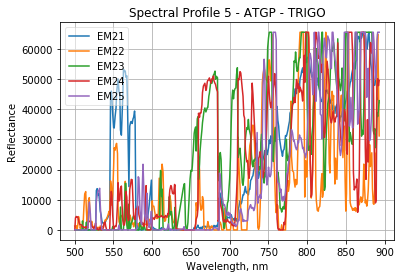

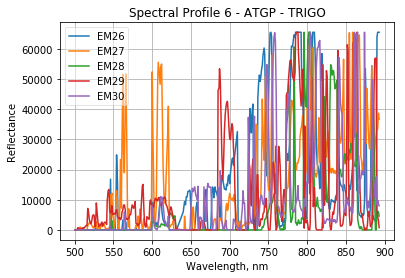

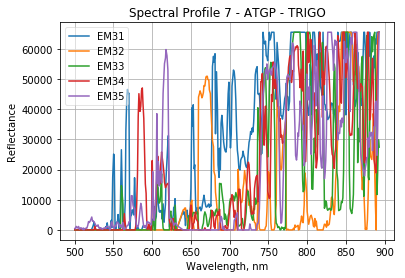

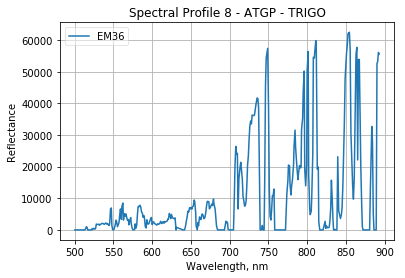

In [ ]:
ee2_axes = {}
ee2_axes['wavelength'] = [float(i) for i in dirs3]
ee2_axes['x']='Wavelength, nm' #x axis label
ee2_axes['y']='Reflectance' #y axis label 
ee2.display(axes=ee2_axes,suffix='TRIGO')

In [ ]:
start_time = time.time()
am2 = amap.FCLS() #Se define el objeto amap Fully Constrained Least Squares
amaps2 = am.map(hypercube,U2,normalize=False) #Se crea el mapa de abundancias para el Hypercubo segun los endmemberds encontrados
am2.display(colorMap='jet',columns=n_endmembers,suffix='TRIGO') # Grafico de mapa de abundancias por cada Endmemberd
elapsed_time = time.time() - start_time
print('Time: ' + str(elapsed_time/60) + ' Minutes')

In [ ]:
with h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/amaps_ATGP.hdf5', 'w') as f:
    dset = f.create_dataset("default", data=amaps2)

In [ ]:
from sklearn.metrics import cohen_kappa_score
[cohen_kappa_score(U[:,:][a], U2[:,:][a]) for a in range(n_endmembers)]

###Fast Iterative Pixel Purity Index (FIPPI)

In [ ]:
start_time = time.time()
ee3 = eea.FIPPI() #Fast Iterative Pixel Purity Index (FIPPI)
n_endmembers =36
U3 = ee3.extract(hypercube,n_endmembers)
elapsed_time = time.time() - start_time
print('Time: ' + str(elapsed_time/60) + ' Minutes')

In [ ]:
with h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/U_FIPPI_2.hdf5', 'w') as f:
    dset = f.create_dataset("default", data=U3)

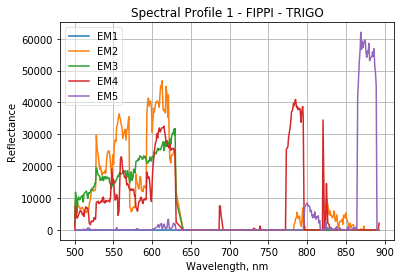

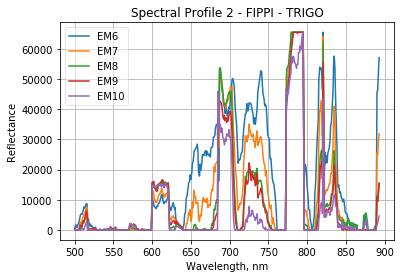

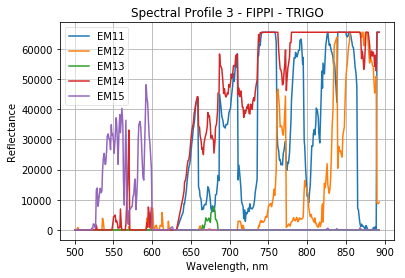

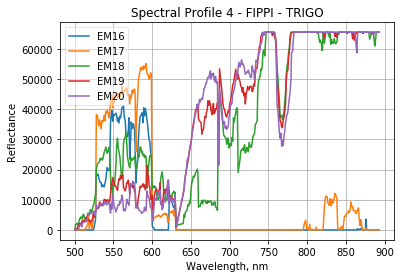

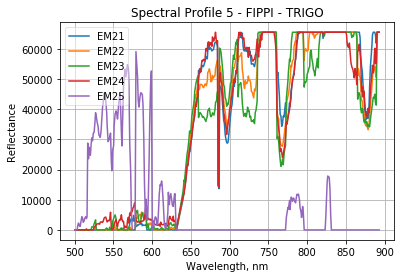

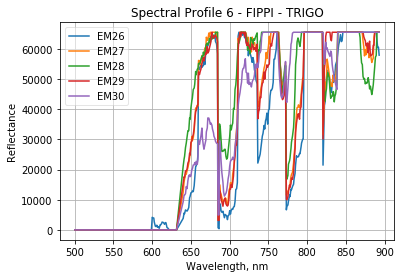

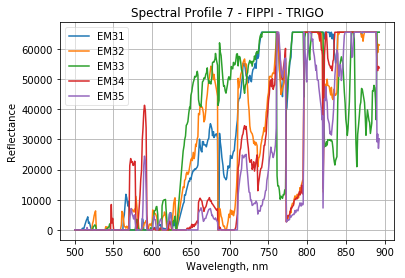

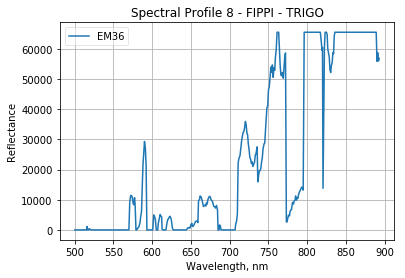

In [ ]:
ee3_axes = {}
ee3_axes['wavelength'] = [float(i) for i in dirs3]
ee3_axes['x']='Wavelength, nm' #x axis label
ee3_axes['y']='Reflectance' #y axis label 
ee3.display(axes=ee3_axes,suffix='TRIGO')

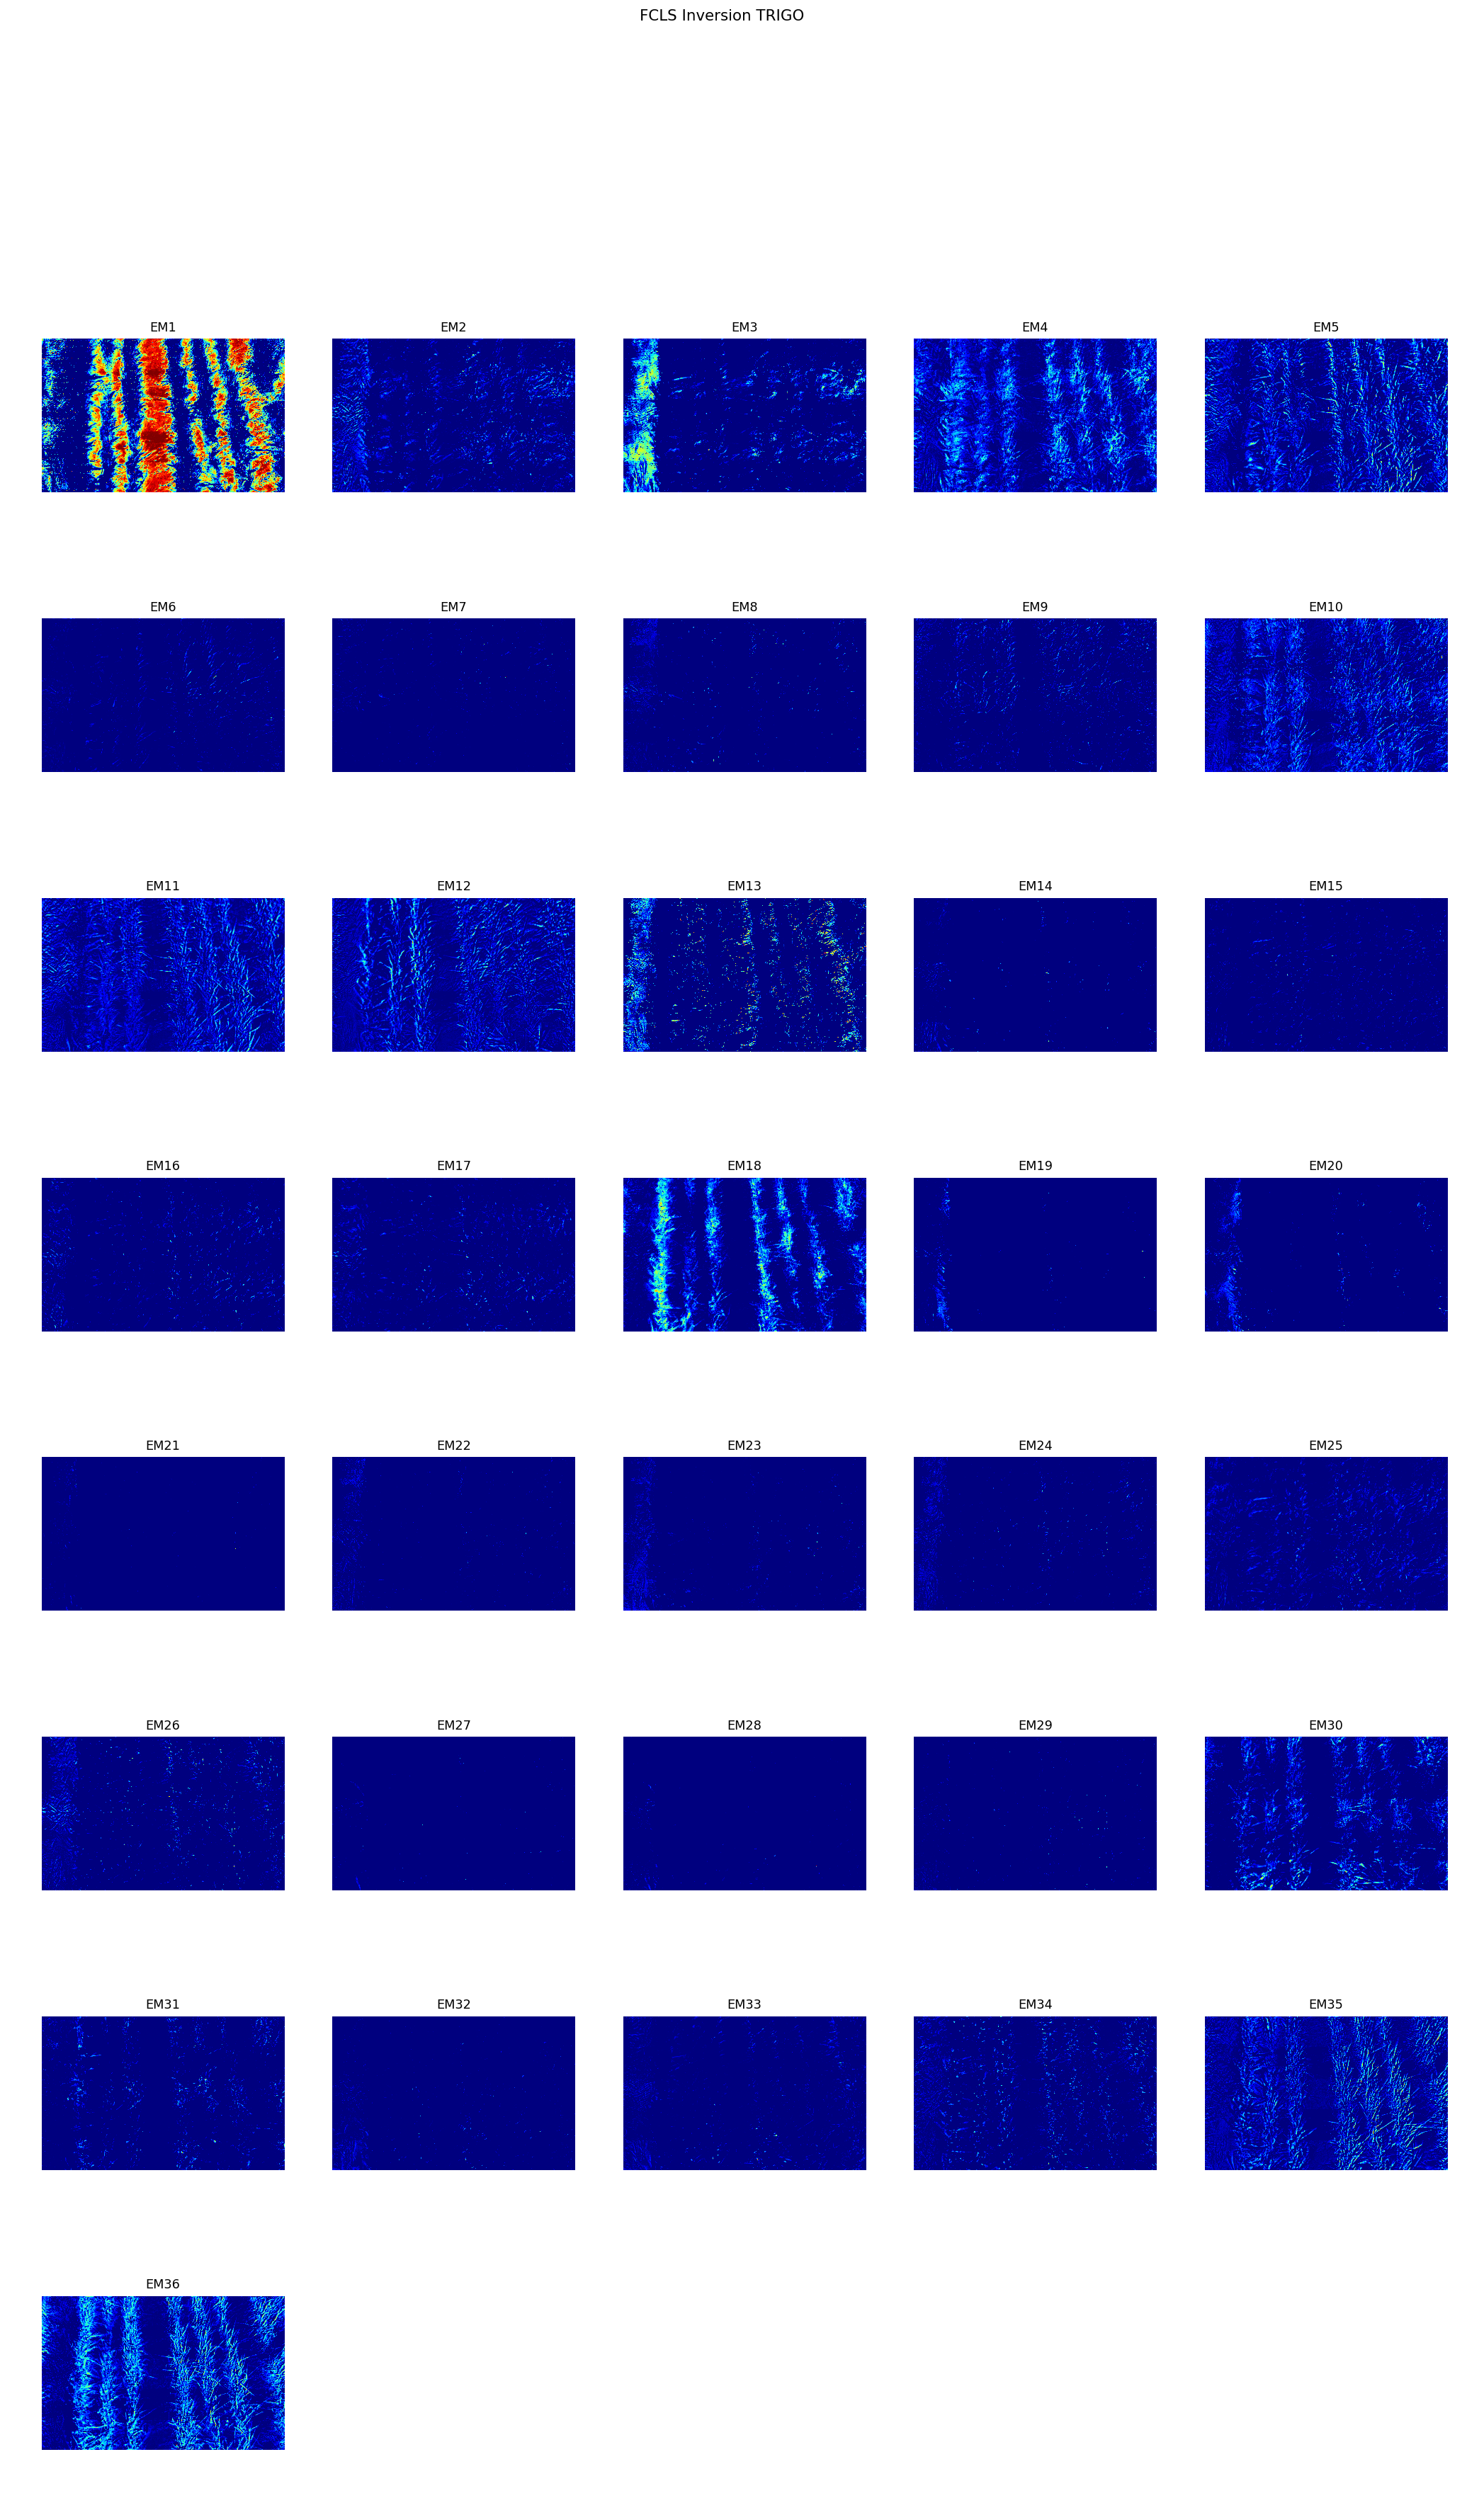

Time: 3160.39045501


<Figure size 432x288 with 0 Axes>

In [ ]:
start_time = time.time()
am = amap.FCLS() #object amap Fully Constrained Least Squares
amaps = am.map(hypercube,U,normalize=False) 
am.display(colorMap='jet',columns=n_endmembers,suffix='TRIGO') # Plot abundance maps
elapsed_time = time.time() - start_time
print('Time: ' + str(elapsed_time))

###Pixel Purity Index (PPI)

In [ ]:
start_time = time.time()
ee4 = eea.PPI() #Pixel Purity Index (PPI)
n_endmembers =36
U4 = ee4.extract(hypercube,n_endmembers)
print('Time: ' + str(elapsed_time))

Time: 3190.56921601


In [ ]:
with h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/U_PPI.hdf5', 'w') as f:
    dset = f.create_dataset("default", data=U4)

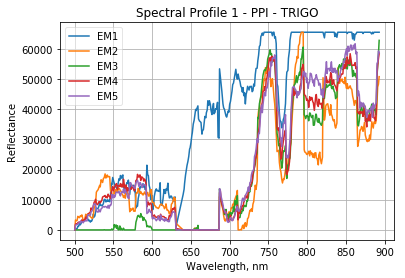

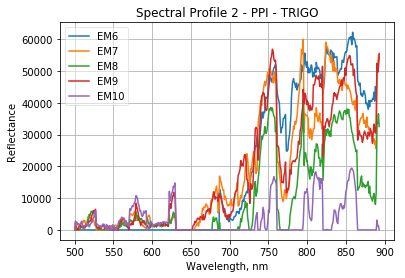

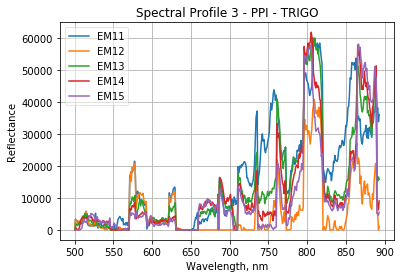

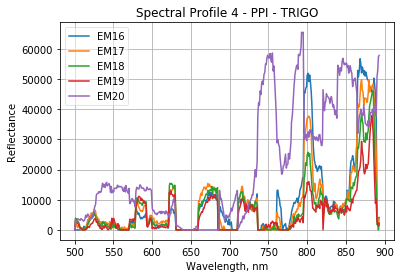

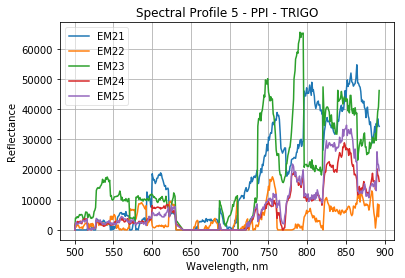

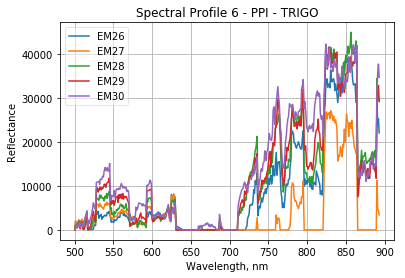

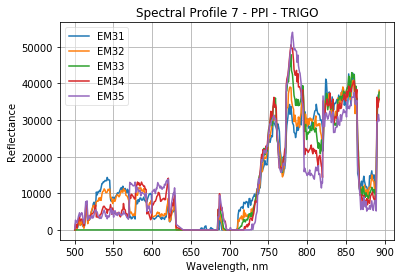

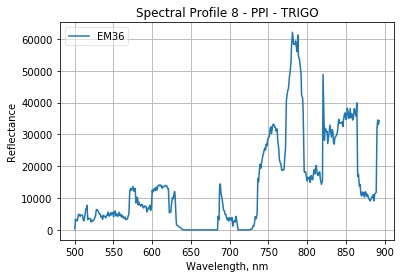

In [ ]:
ee4_axes = {}
ee4_axes['wavelength'] = [float(i) for i in dirs3]
ee4_axes['x']='Wavelength, nm' #x axis label
ee4_axes['y']='Reflectance' #y axis label 
ee4.display(axes=ee4_axes,suffix='TRIGO')

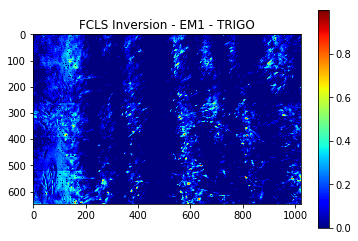

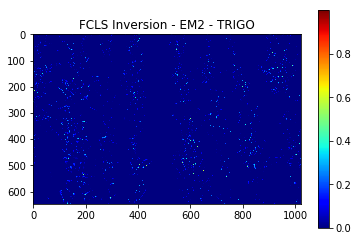

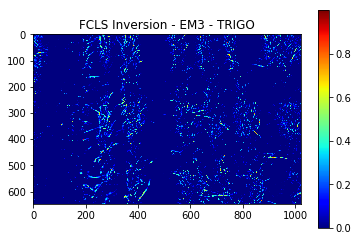

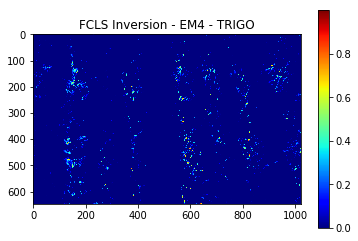

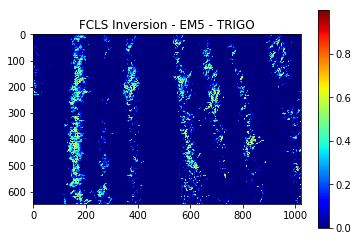

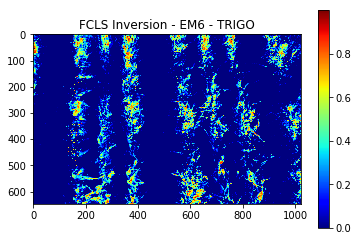

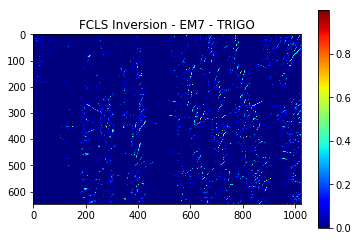

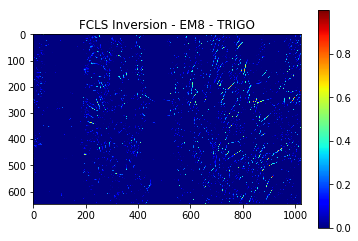

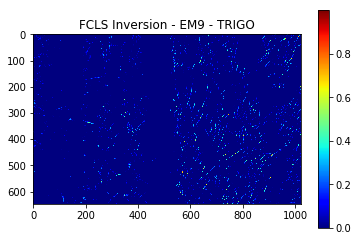

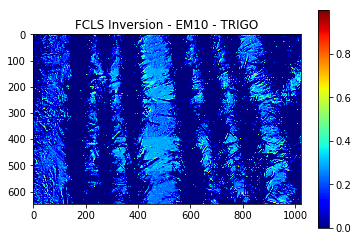

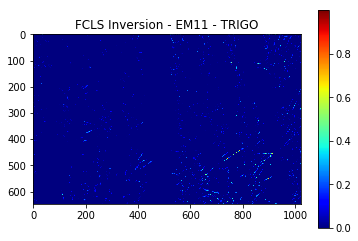

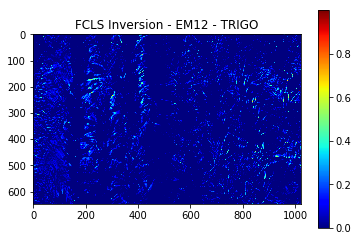

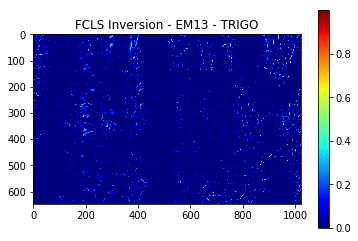

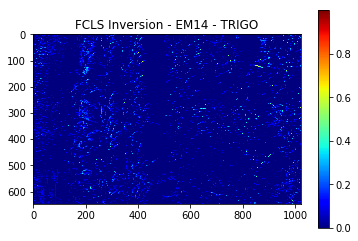

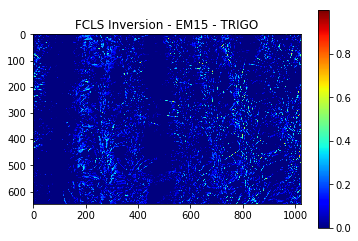

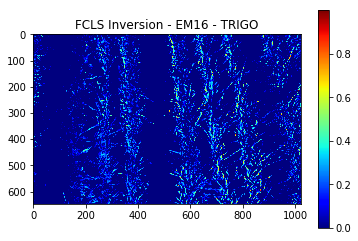

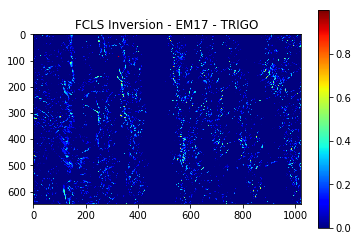

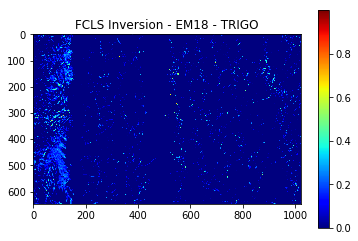

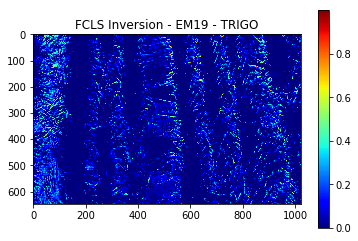

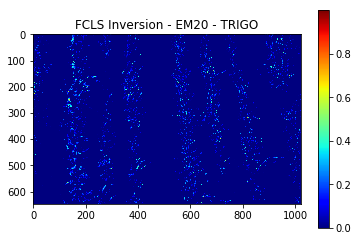

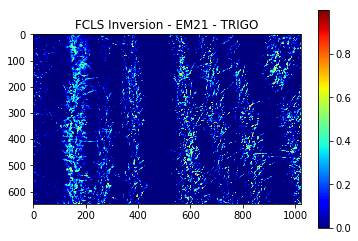

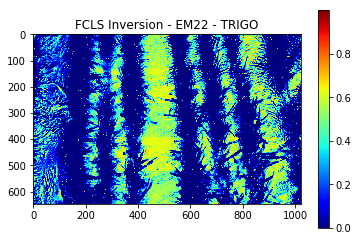

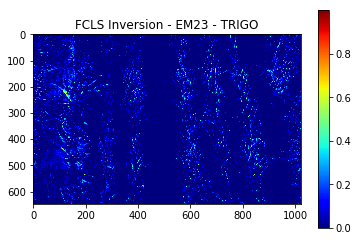

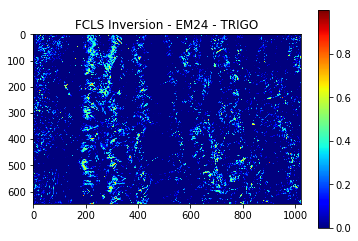

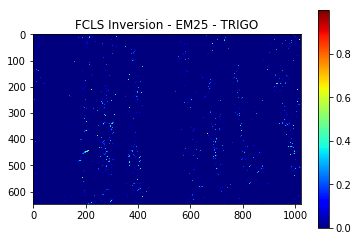

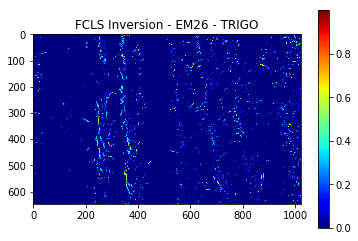

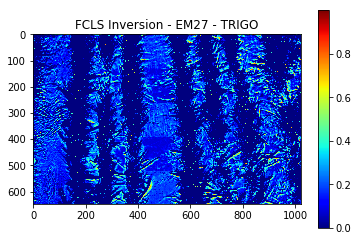

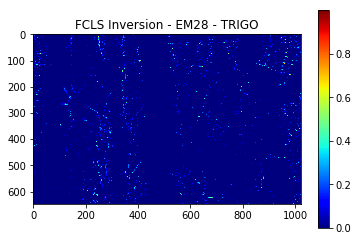

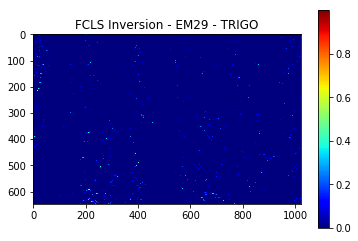

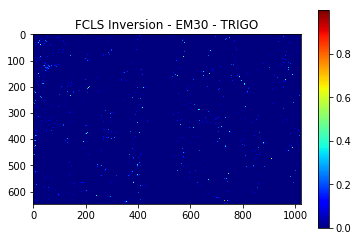

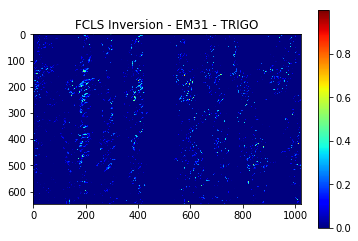

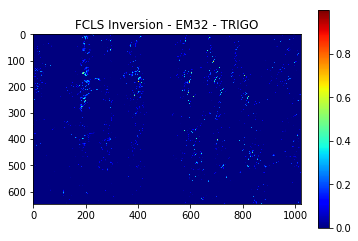

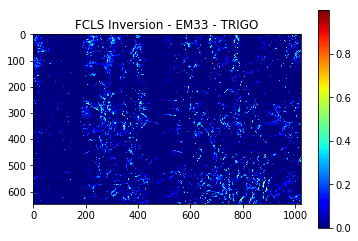

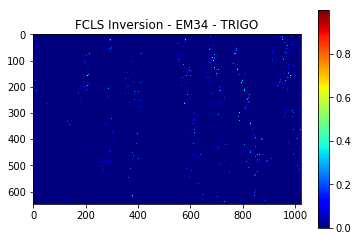

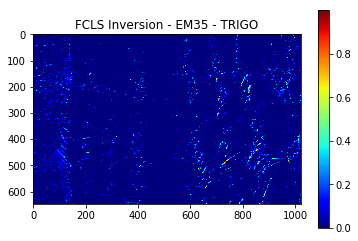

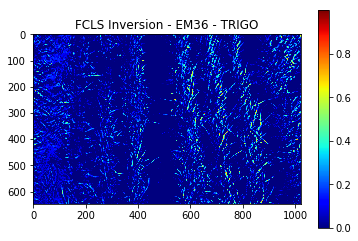

Time: 3769.12812591


<Figure size 432x288 with 0 Axes>

In [ ]:
start_time = time.time()
am = amap.FCLS() #object amap Fully Constrained Least Squares
amaps = am.map(hypercube,U,normalize=False) 
am.display(colorMap='jet',columns=n_endmembers,suffix='TRIGO') # Plot abundance maps
elapsed_time = time.time() - start_time
print('Time: ' + str(elapsed_time))

## Analisis de coincidencia entre los algoritmos usados

In [9]:
# Open endmembers found diferent algorithms
f1 = h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/U_NFINDR.hdf5', 'r')
U_NFINDR = f1['default']
f2 = h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/U_ATGP.hdf5', 'r')
U_ATGP = f2['default']
f3 = h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/U_FIPPI_2.hdf5', 'r')
U_FIPPI = f3['default']
f4 = h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/U_PPI.hdf5', 'r')
U_PPI = f4['default']


In [18]:
data={}
data['U_NFINDR']=U_NFINDR
data['U_ATGP'] = U_ATGP
data['U_FIPPI']= U_FIPPI
data['U_PPI'] = U_PPI

In [ ]:
data

{'U_ATGP': <HDF5 dataset "default": shape (36, 386), type "<f4">,
 'U_FIPPI': <HDF5 dataset "default": shape (178, 386), type "<f4">,
 'U_NFINDR': <HDF5 dataset "default": shape (36, 386), type "<f4">,
 'U_PPI': <HDF5 dataset "default": shape (36, 386), type "<f4">}

In [ ]:
data.keys()

['U_ATGP', 'U_FIPPI', 'U_PPI', 'U_NFINDR']

In [ ]:
from sklearn.metrics import cohen_kappa_score
n_endmembers = 36
# by endmmebers number 
[cohen_kappa_score(data['U_NFINDR'][:][a], data['U_ATGP'][:][a]) for a in range(n_endmembers)]

In [ ]:
[cohen_kappa_score(data['U_NFINDR'][:][a], data['U_PPI'][:][a]) for a in range(n_endmembers)]

In [ ]:
[cohen_kappa_score(data['U_ATGP'][:][a], data['U_PPI'][:][a]) for a in range(n_endmembers)]

In [ ]:
# reshape to one col
U_NFINDR2 = np.array(U_NFINDR)
U_NFINDR2 = U_NFINDR2.reshape((-1))
U_ATGP2 = np.array(U_ATGP)
U_ATGP2 = U_ATGP2.reshape((-1))
U_PPI2 = np.array(U_PPI)
U_PPI2 = U_PPI2.reshape((-1))

In [ ]:
# by algorithm accord
print(cohen_kappa_score(U_NFINDR2, U_ATGP2))
print(cohen_kappa_score(U_NFINDR2, U_PPI2))
print(cohen_kappa_score(U_ATGP2, U_PPI2))

## Endmemberd por pixel

Producto escalar entre cada pixel del hipercubo y cada uno de los endmembers encontrados por el algortimo, donde se marca el pixel con el número de endmember que mayor producto escalar genere.

###Procesamiento

In [83]:
# Se deben cargar  primero los resultados de los algoritmos y generar el diccionario que los contiene. Proceso dado en el segmento anterior
from sklearn.preprocessing import normalize
norm = normalize(data['U_ATGP'], axis=1) #Se normalizan los datos previo al producto escalar entre el hipercubo y los endmembers

y,x,_ = hypercube[:,:,:].shape
out = np.zeros((y,x))
for a in tqdm (range(y)):
  for b in range(x):
    value = [np.dot(hypercube[a,b,:], norm[i]) for i in range(len(norm))] #producto escalar entre el array endmember y el pixel hipercubo 
    out[a,b] = np.where(value == np.max(value))[0][0] # se asigna el número de endmember con mayor producto escalar


100%|██████████| 648/648 [01:11<00:00,  9.09it/s]


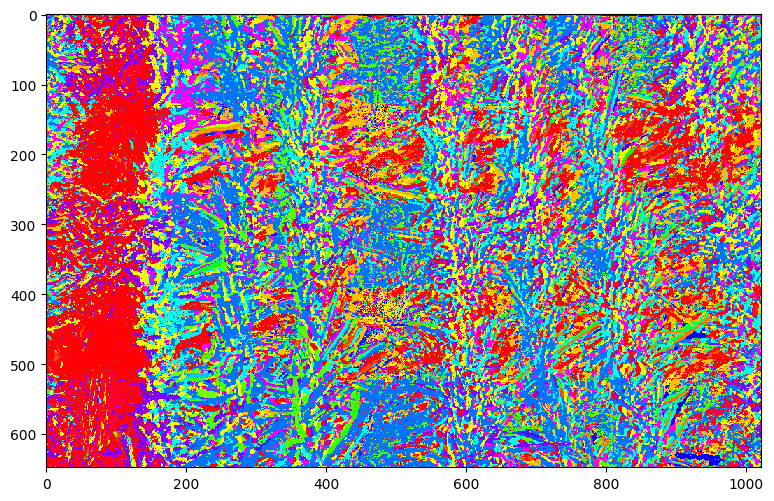

In [84]:
fig = plt.figure(figsize=(10,6), dpi=100)   
plt.imshow(out, cmap='gist_rainbow')
plt.show()

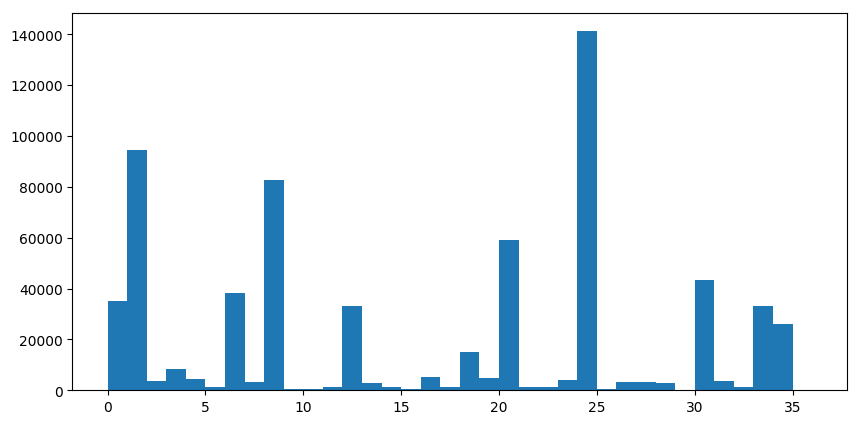

In [86]:
fig = plt.figure(figsize=(10,5), dpi=100)
hist = plt.hist(np.ndarray.flatten(out),bins=36,range=[0,36]) 

Se guarda la matriz generada

In [85]:
# Se guarda la matriz con la asignación de endmember respectivo, para su posterior analisis. debido a que su generación puede tomar alrededor de 45 minutos
with h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/endmember_pixel_U_ATGP.hdf5', 'w') as f:
    dset = f.create_dataset("default", data=out)

###Visualización

se cargan las matrices generadas previamente

In [87]:
# Se cargan las matrices que fueron generadas en el paso anterior por cada Algortimo
m1 = h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/endmember_pixel_U_NFINDR.hdf5', 'r')
pixel_U_NFINDR = m1['default']
m2 = h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/endmember_pixel_U_ATGP.hdf5', 'r')
pixel_U_ATGP = m2['default']
m3 = h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/endmember_pixel_U_PPI.hdf5', 'r')
pixel_U_PPI = m3['default']

Visualización de la clasificación generada por cada endmember asignado a un pixel

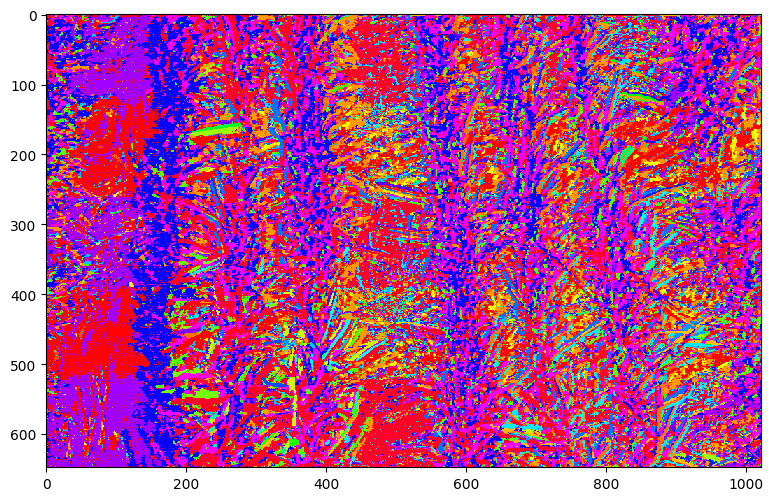

In [88]:
# Se plotea la clasicación obtenida por el metodo de producto escalar para cada Algoritmo
fig = plt.figure(figsize=(10,6), dpi=100)   
plt.imshow(pixel_U_NFINDR, cmap='gist_rainbow')
plt.show()

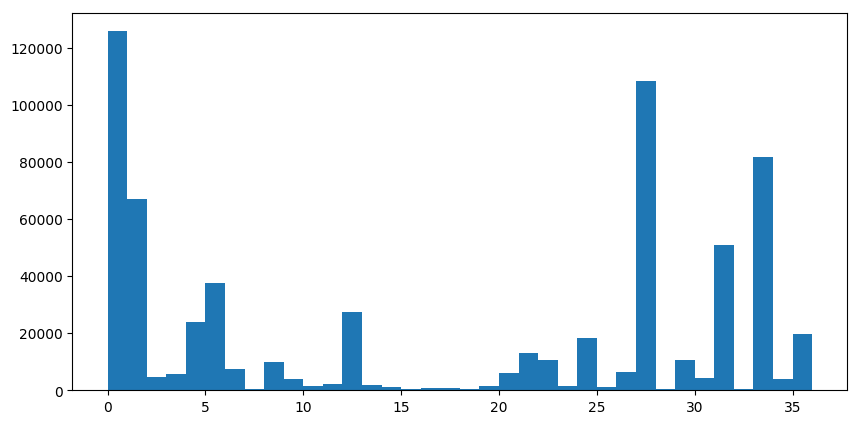

In [89]:
fig = plt.figure(figsize=(10,5), dpi=100)
hist = plt.hist(np.ndarray.flatten(pixel_U_NFINDR[:,:]),bins=36,range=[0,36]) 

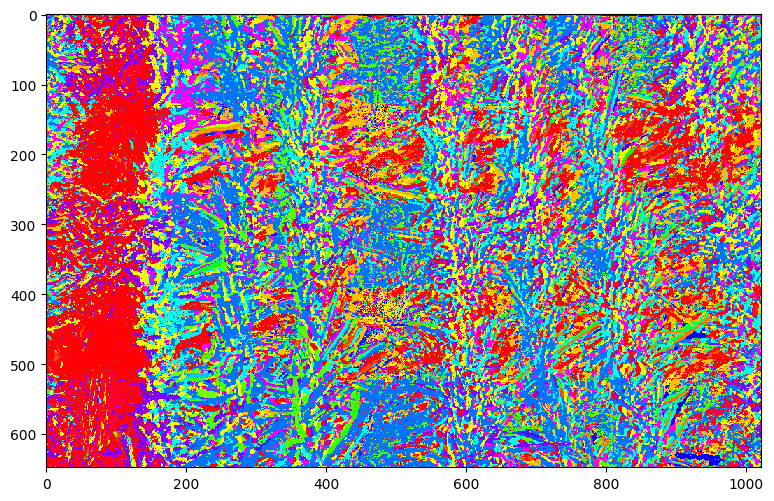

In [90]:
fig = plt.figure(figsize=(10,6), dpi=100)   
plt.imshow(pixel_U_ATGP, cmap='gist_rainbow')
plt.show()

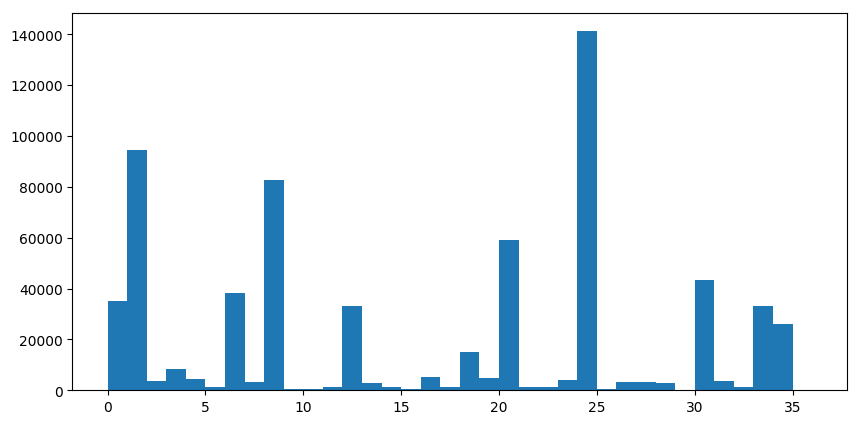

In [91]:
fig = plt.figure(figsize=(10,5), dpi=100)
hist = plt.hist(np.ndarray.flatten(pixel_U_ATGP[:,:]),bins=36,range=[0,36]) 

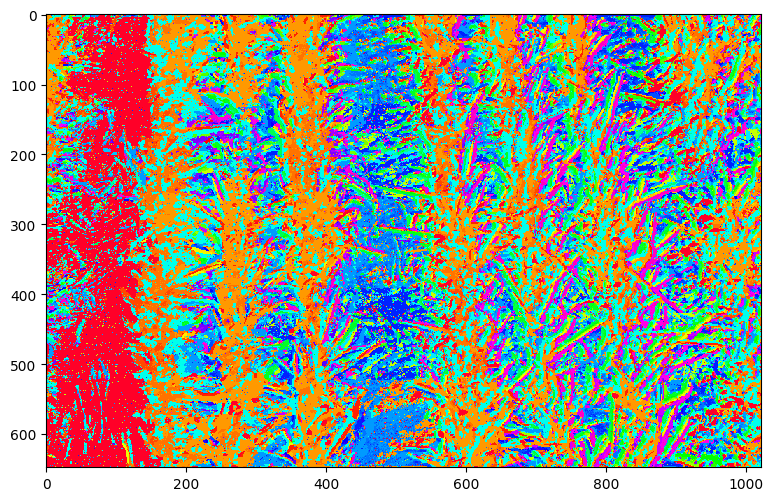

In [92]:
fig = plt.figure(figsize=(10,6), dpi=100)   
plt.imshow(pixel_U_PPI, cmap='gist_rainbow')
plt.show()

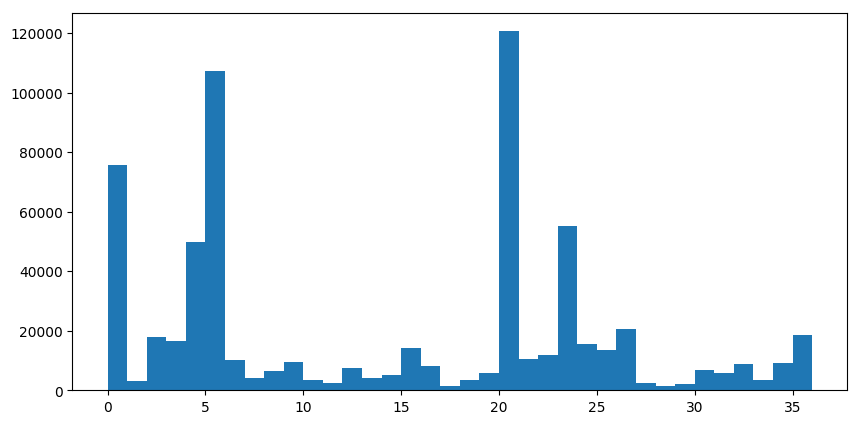

In [93]:
fig = plt.figure(figsize=(10,5), dpi=100)
hist = plt.hist(np.ndarray.flatten(pixel_U_PPI[:,:]),bins=36,range=[0,36]) 